# N-beam study

In [1017]:
from utils import*;imp.reload(dsp)
import io,os,copy,pandas as pd,numpy as np
from subprocess import check_output
import misc_utils as mut;imp.reload(mut)
from IPython.display import display, Markdown, Latex
import EDutils
from EDutils import utilities as ut 
from blochwave import bloch          ;imp.reload(bloch)
from blochwave import bloch_pp as bl ;imp.reload(bl)
from scipy import integrate
%matplotlib inline

print(check_output(
    'cd {ed_path}; git log | head -n1'.format(
        ed_path=os.path.dirname(os.path.realpath(EDutils.__file__+'/..'))),
    shell=True).decode())

cif_file='resources/LTA.cif'
figs = (18,5)
rpath = 'dat/LTA/rocks'
rock_path=lambda name:'%s/%s' %(rpath,name)
rock_file=lambda name:rock_path(name)+'/rock_.pkl'

# dsp.matplotlib.use('agg')

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
commit a16da040645110046b32c7d8602b124af980cb3c



## Setup
We choose a random orientation $\mathbf u$ around which we want to simulate a rocking curve.

In [638]:
u  = np.array([0.66865363, 0.29164837, 0.6521759 ])
u  = u/np.linalg.norm(u)

Sargs=dict(cif_file=cif_file,Smax=0.005,keV=200,Nmax=11,solve=False)
b=bloch.Bloch(path='dat/LTA',u=u,**Sargs)
b.show_df_G(n=10)

...Nmax... 
...Structure factors...
structure factors updated.
...Excitation errors... 
...Vg... 
object saved
dat/LTA/LTA212_200keV_bloch.pkl
                   Sw        Fg     Ikin       Vg      Uga   xi_g
(0, 0, 0)    -2.9e-15  0.0+0.0j      0.0 0.00e+00  0.0e+00    inf
(-8, 0, 8)   -1.4e-05 -3.7+0.0j     13.9 2.21e-03  9.8e-04  40758
(4, 4, -6)    1.5e-04 -1.5-0.0j      2.2 8.88e-04  3.9e-04 101352
(2, -7, 1)   -3.1e-04  4.1-0.0j     16.4 2.41e-03  1.1e-03  37430
(-7, -7, 10) -3.3e-04  2.2+0.0j      4.7 1.29e-03  5.7e-04  69710
(5, 6, -8)   -4.0e-04 -4.9+0.0j     24.1 2.91e-03  1.3e-03  30911
(10, -8, -7) -6.7e-04  1.3-0.0j      1.8 7.98e-04  3.5e-04 112750
(8, -10, -4) -8.3e-04  5.0-0.0j     25.4 2.99e-03  1.3e-03  30092
(3, 2, -4)   -9.0e-04 -0.2+0.0j      0.0 1.04e-04  4.6e-05 866401
(7, -3, -6)   9.0e-04  3.2+0.0j     10.5 1.93e-03  8.5e-04  46709


In [57]:
uvw=ut.get_uvw(u,osc=2,npts=101)
rock = bl.Bloch_cont(path=rock_path('Nbeam'),uvw=uvw,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw)) )

### Excitation errors

69 beam within sw_min=5.00e-05
too many beams 69/50 : keeping only top 50


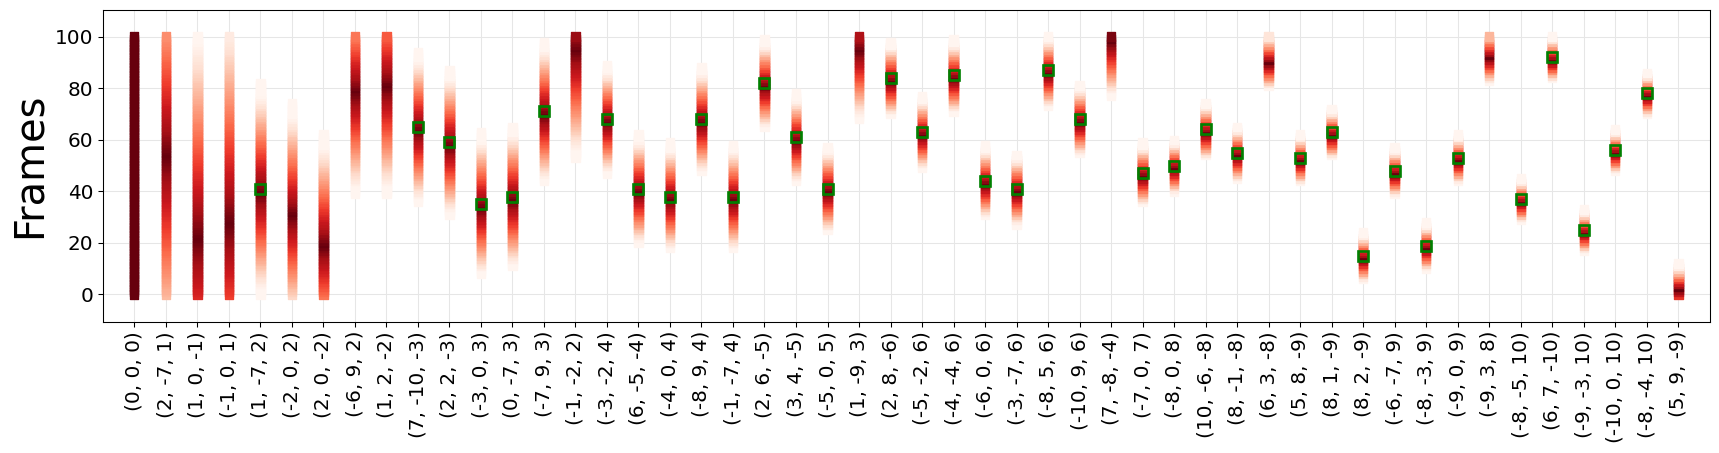

In [53]:
rock=ut.load_pkl(rock_file('Nbeam'))
fig,ax=rock.show_excitation_map(vm=0.0045,sw_min=5e-5,nb_max=50,figs=figs);

### Solve

In [75]:
rock.do('solve',Smax=0.01,thicks=np.arange(10,5001,10))

 ...assembling 142x142 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__000.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__000.pkl
 ...assembling 143x143 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__001.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__001.pkl
 ...assembling 141x141 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__002.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__002.pkl
 ...assembling 142x142 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__003.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__003.pkl
 ...assembling 143x143 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__004.pkl
objec

In [81]:
rock=ut.load_pkl(rock_file)
rock.do('_set_beams_vs_thickness', thicks=np.arange(10,5001,10))

... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__000.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__001.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__002.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__003.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__004.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__005.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__006.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__007.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__008.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__009.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__010.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__011.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__012.pkl
... beam vs 

### Rocking curves

23477.120449896698
total number of beams:1
gathering the intensities
gathering plots


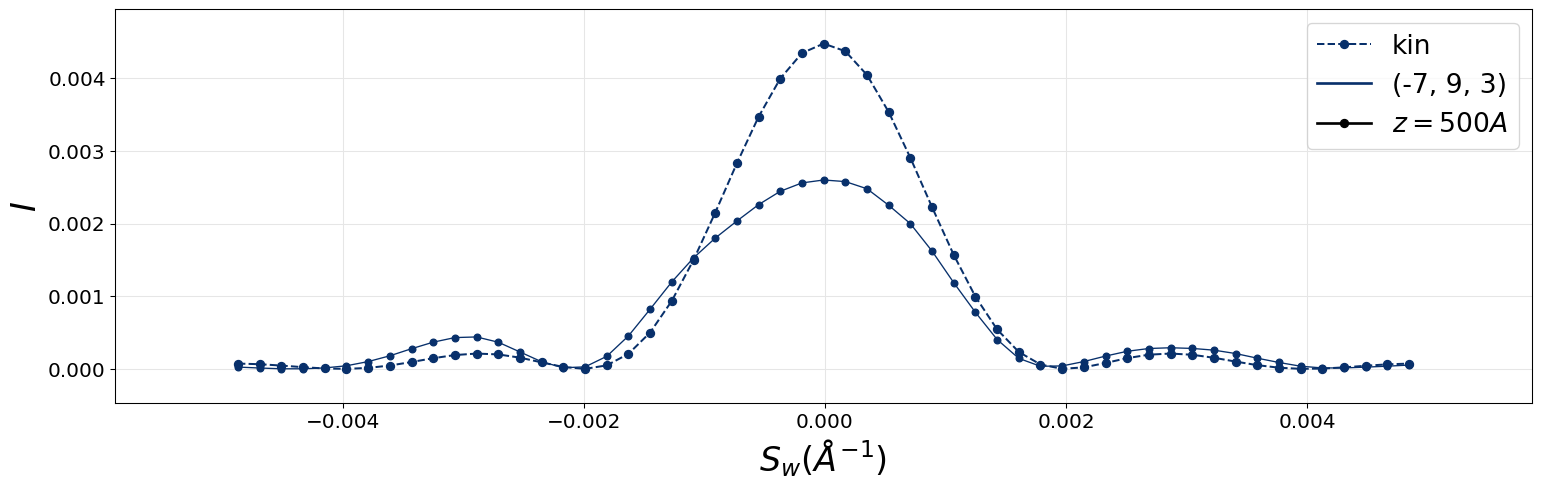

In [1096]:
rock=ut.load_pkl(rock_file('Nbeam'))
h=str((-7,9,3))
t = 500
sw=rock.beams.loc[h].Sw
xi_g=np.real(df_Fhkl.loc[h].xi_g);print(xi_g)
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

fig,ax = dsp.create_fig(figsize=figs)
cmap='Blues'
cm=dsp.getCs(cmap,1)
ax.plot(sw,Ikin,'--o',color=cm[0],label='kin');
rock.plot_rocking(ax=ax,refl=[h],zs=[t],cmap=cmap);#,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')

In [62]:
zs=[100,200,300,400,500]
hklf=rock.get_full_refl(Swm=0.0045)
rep = lambda s:s.replace(', ','_').replace('(','').replace(')','')
for h in hklf:
    fig,ax=rock.plot_rocking(refl=[h],zs=zs,figsize=figs,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')


removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-1_-7_4.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-1_-9_5.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_0_10.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_2_9.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_4_8.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_5_8.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_6_7.png
removing Friedel pairs
total number of beams:1
gathering the intensi

In [1085]:
# h0=str((-6,0,6))
# txt='![](figs/rock_Nbeam_%s.png)' %(rep(h0))
# display(Markdown(txt))
# h0 in hklf

In [695]:
n=5 #number of images per rows
nrows=len(hklf)//n
hs_=np.reshape(hklf[:n*nrows],(nrows,n))
name='Nbeam'
txt=''
for hs in hs_:
    txt +='\n%s\n%s --\n%s\n'%(
        ' | ' .join(hs),
        ' -- | '*(len(hs)-1),
        ' | '.join([ '![](figs/rock_%s_%s.png)' %(name,rep(h)) for h in hs] ),
    )
# print(txt)
display(Markdown(txt))



(-1, -7, 4) | (-1, -9, 5) | (-10, 0, 10) | (-10, 2, 9) | (-10, 4, 8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-1_-7_4.png) | ![](figs/rock_Nbeam_-1_-9_5.png) | ![](figs/rock_Nbeam_-10_0_10.png) | ![](figs/rock_Nbeam_-10_2_9.png) | ![](figs/rock_Nbeam_-10_4_8.png)

(-10, 5, 8) | (-10, 6, 7) | (-10, 7, 7) | (-10, 9, 6) | (-2, -7, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-10_5_8.png) | ![](figs/rock_Nbeam_-10_6_7.png) | ![](figs/rock_Nbeam_-10_7_7.png) | ![](figs/rock_Nbeam_-10_9_6.png) | ![](figs/rock_Nbeam_-2_-7_5.png)

(-2, -9, 6) | (-3, -10, 7) | (-3, -2, 4) | (-3, -7, 6) | (-3, -9, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-2_-9_6.png) | ![](figs/rock_Nbeam_-3_-10_7.png) | ![](figs/rock_Nbeam_-3_-2_4.png) | ![](figs/rock_Nbeam_-3_-7_6.png) | ![](figs/rock_Nbeam_-3_-9_7.png)

(-3, 0, 3) | (-4, -10, 8) | (-4, -2, 5) | (-4, -4, 6) | (-4, -5, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-3_0_3.png) | ![](figs/rock_Nbeam_-4_-10_8.png) | ![](figs/rock_Nbeam_-4_-2_5.png) | ![](figs/rock_Nbeam_-4_-4_6.png) | ![](figs/rock_Nbeam_-4_-5_6.png)

(-4, -7, 7) | (-4, -9, 8) | (-4, 0, 4) | (-5, -10, 9) | (-5, -2, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-4_-7_7.png) | ![](figs/rock_Nbeam_-4_-9_8.png) | ![](figs/rock_Nbeam_-4_0_4.png) | ![](figs/rock_Nbeam_-5_-10_9.png) | ![](figs/rock_Nbeam_-5_-2_6.png)

(-5, -4, 7) | (-5, -5, 7) | (-5, -7, 8) | (-5, -9, 9) | (-5, 0, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-5_-4_7.png) | ![](figs/rock_Nbeam_-5_-5_7.png) | ![](figs/rock_Nbeam_-5_-7_8.png) | ![](figs/rock_Nbeam_-5_-9_9.png) | ![](figs/rock_Nbeam_-5_0_5.png)

(-6, -10, 10) | (-6, -2, 7) | (-6, -4, 8) | (-6, -5, 8) | (-6, -7, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-6_-10_10.png) | ![](figs/rock_Nbeam_-6_-2_7.png) | ![](figs/rock_Nbeam_-6_-4_8.png) | ![](figs/rock_Nbeam_-6_-5_8.png) | ![](figs/rock_Nbeam_-6_-7_9.png)

(-6, -9, 10) | (-6, 0, 6) | (-6, 2, 5) | (-7, -2, 8) | (-7, -3, 8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-6_-9_10.png) | ![](figs/rock_Nbeam_-6_0_6.png) | ![](figs/rock_Nbeam_-6_2_5.png) | ![](figs/rock_Nbeam_-7_-2_8.png) | ![](figs/rock_Nbeam_-7_-3_8.png)

(-7, -4, 9) | (-7, -5, 9) | (-7, -6, 10) | (-7, -8, 10) | (-7, 0, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-7_-4_9.png) | ![](figs/rock_Nbeam_-7_-5_9.png) | ![](figs/rock_Nbeam_-7_-6_10.png) | ![](figs/rock_Nbeam_-7_-8_10.png) | ![](figs/rock_Nbeam_-7_0_7.png)

(-7, 2, 6) | (-7, 9, 3) | (-8, -2, 9) | (-8, -3, 9) | (-8, -4, 10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-7_2_6.png) | ![](figs/rock_Nbeam_-7_9_3.png) | ![](figs/rock_Nbeam_-8_-2_9.png) | ![](figs/rock_Nbeam_-8_-3_9.png) | ![](figs/rock_Nbeam_-8_-4_10.png)

(-8, -5, 10) | (-8, 0, 8) | (-8, 2, 7) | (-8, 4, 6) | (-8, 5, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-8_-5_10.png) | ![](figs/rock_Nbeam_-8_0_8.png) | ![](figs/rock_Nbeam_-8_2_7.png) | ![](figs/rock_Nbeam_-8_4_6.png) | ![](figs/rock_Nbeam_-8_5_6.png)

(-8, 7, 5) | (-8, 9, 4) | (-9, -2, 10) | (-9, -3, 10) | (-9, 0, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-8_7_5.png) | ![](figs/rock_Nbeam_-8_9_4.png) | ![](figs/rock_Nbeam_-9_-2_10.png) | ![](figs/rock_Nbeam_-9_-3_10.png) | ![](figs/rock_Nbeam_-9_0_9.png)

(-9, 2, 8) | (-9, 4, 7) | (-9, 5, 7) | (-9, 7, 6) | (-9, 9, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-9_2_8.png) | ![](figs/rock_Nbeam_-9_4_7.png) | ![](figs/rock_Nbeam_-9_5_7.png) | ![](figs/rock_Nbeam_-9_7_6.png) | ![](figs/rock_Nbeam_-9_9_5.png)

(0, -7, 3) | (0, -9, 4) | (1, -7, 2) | (10, -1, -10) | (10, -10, -6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_0_-7_3.png) | ![](figs/rock_Nbeam_0_-9_4.png) | ![](figs/rock_Nbeam_1_-7_2.png) | ![](figs/rock_Nbeam_10_-1_-10.png) | ![](figs/rock_Nbeam_10_-10_-6.png)

(10, -2, -10) | (10, -4, -9) | (10, -5, -8) | (10, -6, -8) | (10, -8, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_10_-2_-10.png) | ![](figs/rock_Nbeam_10_-4_-9.png) | ![](figs/rock_Nbeam_10_-5_-8.png) | ![](figs/rock_Nbeam_10_-6_-8.png) | ![](figs/rock_Nbeam_10_-8_-7.png)

(2, 10, -7) | (2, 2, -3) | (2, 4, -4) | (2, 6, -5) | (2, 8, -6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_2_10_-7.png) | ![](figs/rock_Nbeam_2_2_-3.png) | ![](figs/rock_Nbeam_2_4_-4.png) | ![](figs/rock_Nbeam_2_6_-5.png) | ![](figs/rock_Nbeam_2_8_-6.png)

(3, 10, -8) | (3, 2, -4) | (3, 4, -5) | (3, 6, -6) | (3, 8, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_3_10_-8.png) | ![](figs/rock_Nbeam_3_2_-4.png) | ![](figs/rock_Nbeam_3_4_-5.png) | ![](figs/rock_Nbeam_3_6_-6.png) | ![](figs/rock_Nbeam_3_8_-7.png)

(4, 10, -9) | (4, 2, -5) | (4, 4, -6) | (4, 6, -7) | (4, 8, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_4_10_-9.png) | ![](figs/rock_Nbeam_4_2_-5.png) | ![](figs/rock_Nbeam_4_4_-6.png) | ![](figs/rock_Nbeam_4_6_-7.png) | ![](figs/rock_Nbeam_4_8_-8.png)

(5, -5, -3) | (5, 10, -10) | (5, 2, -6) | (5, 4, -7) | (5, 6, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_5_-5_-3.png) | ![](figs/rock_Nbeam_5_10_-10.png) | ![](figs/rock_Nbeam_5_2_-6.png) | ![](figs/rock_Nbeam_5_4_-7.png) | ![](figs/rock_Nbeam_5_6_-8.png)

(5, 8, -9) | (6, -1, -6) | (6, -3, -5) | (6, -5, -4) | (6, 1, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_5_8_-9.png) | ![](figs/rock_Nbeam_6_-1_-6.png) | ![](figs/rock_Nbeam_6_-3_-5.png) | ![](figs/rock_Nbeam_6_-5_-4.png) | ![](figs/rock_Nbeam_6_1_-7.png)

(6, 2, -7) | (6, 4, -8) | (6, 6, -9) | (6, 7, -10) | (6, 8, -10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_6_2_-7.png) | ![](figs/rock_Nbeam_6_4_-8.png) | ![](figs/rock_Nbeam_6_6_-9.png) | ![](figs/rock_Nbeam_6_7_-10.png) | ![](figs/rock_Nbeam_6_8_-10.png)

(7, -1, -7) | (7, -10, -3) | (7, -3, -6) | (7, -5, -5) | (7, 1, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_7_-1_-7.png) | ![](figs/rock_Nbeam_7_-10_-3.png) | ![](figs/rock_Nbeam_7_-3_-6.png) | ![](figs/rock_Nbeam_7_-5_-5.png) | ![](figs/rock_Nbeam_7_1_-8.png)

(7, 2, -8) | (7, 3, -9) | (7, 4, -9) | (7, 5, -10) | (8, -1, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_7_2_-8.png) | ![](figs/rock_Nbeam_7_3_-9.png) | ![](figs/rock_Nbeam_7_4_-9.png) | ![](figs/rock_Nbeam_7_5_-10.png) | ![](figs/rock_Nbeam_8_-1_-8.png)

(8, -10, -4) | (8, -3, -7) | (8, -5, -6) | (8, -8, -5) | (8, 1, -9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_8_-10_-4.png) | ![](figs/rock_Nbeam_8_-3_-7.png) | ![](figs/rock_Nbeam_8_-5_-6.png) | ![](figs/rock_Nbeam_8_-8_-5.png) | ![](figs/rock_Nbeam_8_1_-9.png)

(8, 2, -9) | (8, 4, -10) | (9, -1, -9) | (9, -10, -5) | (9, -3, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_8_2_-9.png) | ![](figs/rock_Nbeam_8_4_-10.png) | ![](figs/rock_Nbeam_9_-1_-9.png) | ![](figs/rock_Nbeam_9_-10_-5.png) | ![](figs/rock_Nbeam_9_-3_-8.png)

(9, -4, -8) | (9, -5, -7) | (9, -6, -7) | (9, -8, -6) | (9, 2, -10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_9_-4_-8.png) | ![](figs/rock_Nbeam_9_-5_-7.png) | ![](figs/rock_Nbeam_9_-6_-7.png) | ![](figs/rock_Nbeam_9_-8_-6.png) | ![](figs/rock_Nbeam_9_2_-10.png)


### I_kin vs I_dyn

In [967]:
t=500
rock=ut.load_pkl(rock_file('Nbeam'))
# rock._integrate_rocking(refl=hklf)
iZs,nzs=rock._get_iZs(iZs=None,zs=[t])
iZ=iZs[0]#;print(t,iZ)
hklf=rock.get_full_refl(Swm=0.0045)
df = ut.load_pkl(b.get_Fhkl_pkl()).loc[hklf,['F']]
df['Ug']   = np.real(np.abs(df.F*cst.meff(b.keV)/(np.pi*b.crys.volume)))
df['xi_g'] = np.real(b.k0/df.Ug)

Ikin = lambda sw,t,xi_g:((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2
df['Idyns'] = np.array([rock.Iz_dyn[h][iZ] for h in hklf])
df['Ikins'] = np.abs([integrate.trapz(Ikin(sw,t,xi_g),sw) for xi_g,sw in zip(df.xi_g,rock.beams.loc[hklf,'Sw']) ])
df['rel']=np.abs(df.Idyns-df.Ikins)/df.Ikins

formats={'xi_g':'{:>7.0f}','Idyns':'{:>6.2e}','Ikins':'{:>6.2e}'}
print(df.sort_values('Ikins',ascending=False)[['xi_g','Idyns','Ikins','rel']][:10].to_string(formatters={k: v.format for k, v in formats.items()}))
Rfactor=np.abs(df.Idyns-df.Ikins).sum()/df.Ikins.sum()*100
print('Rfactor=%.1f' %Rfactor)
# print(len(df.loc[df.rel<0.1].sort_values('rel')),len(hklf))


               xi_g    Idyns    Ikins       rel
(-5, 0, 5)     5642 8.64e-05 1.48e-04  0.416755
(-3, 0, 3)     6471 1.93e-04 1.13e-04  0.709117
(-4, 0, 4)     6753 3.73e-05 1.04e-04  0.639373
(0, -9, 4)     8529 5.45e-05 6.48e-05  0.158246
(2, 2, -3)     9870 4.32e-05 4.85e-05  0.109881
(-5, -4, 7)   10390 3.56e-05 4.38e-05  0.186111
(5, 4, -7)    10390 3.41e-05 4.38e-05  0.221066
(-9, 9, 5)    13451 2.63e-05 2.61e-05  0.006483
(-5, -9, 9)   13451 3.11e-05 2.61e-05  0.191582
(-5, -5, 7)   13997 2.74e-05 2.41e-05  0.138553
Rfactor=39.7


In [961]:
### locate a reflection from coordinates  
x,y = 1.8e-5,6e-5
i=np.sqrt(0*(df.Ikins-x)**2 + (df.Idyns-y)**2 ).argmin()
df.iloc[i].name

'(-5, -5, 7)'

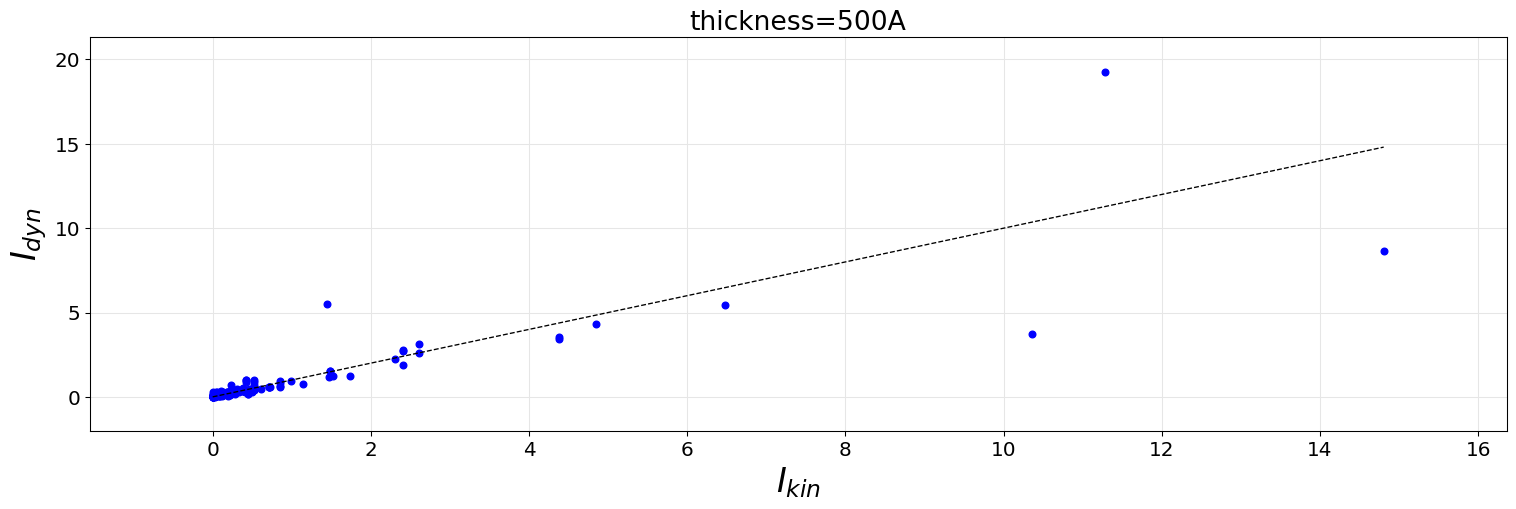

In [968]:
Imax=df.Ikins.max()*1e5

plts  = [[df.Ikins*1e5,df.Idyns*1e5,'bo','']]
plts  += [[[0,Imax],[0,s*Imax],'k--',''] for s in [1] ]#[0.5,1,2]]
fig,ax = dsp.stddisp(plts,title="thickness=%dA" %t,labs=['$I_{kin}$','$I_{dyn}$'],
                     figsize=figs)#,xylims=[0,2e-4,0,1e-4])

### Thickness dependent R factor

In [849]:

rock=ut.load_pkl(rock_file('Nbeam'))
hklf=rock.get_full_refl(Swm=0.0045)

thicks=rock.load(0).z
Rfactors=np.zeros(thicks.shape)
Ikin = lambda sw,t,xi_g:((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

for i,t in enumerate(thicks):    
    iZs,nzs=rock._get_iZs(iZs=None,zs=[t])
    Idyns = np.array([rock.Iz_dyn[h][iZs[0]] for h in hklf])
    Ikins = np.abs([integrate.trapz(Ikin(sw,t,xi_g),sw) for xi_g,sw in zip(df.xi_g,rock.beams.loc[hklf,'Sw']) ])
    Rfactors[i]=np.abs(Idyns-Ikins).sum()/Ikins.sum()*100
    # print('t=%d, Rfactor=%.1f' %(t,Rfactors[i]))

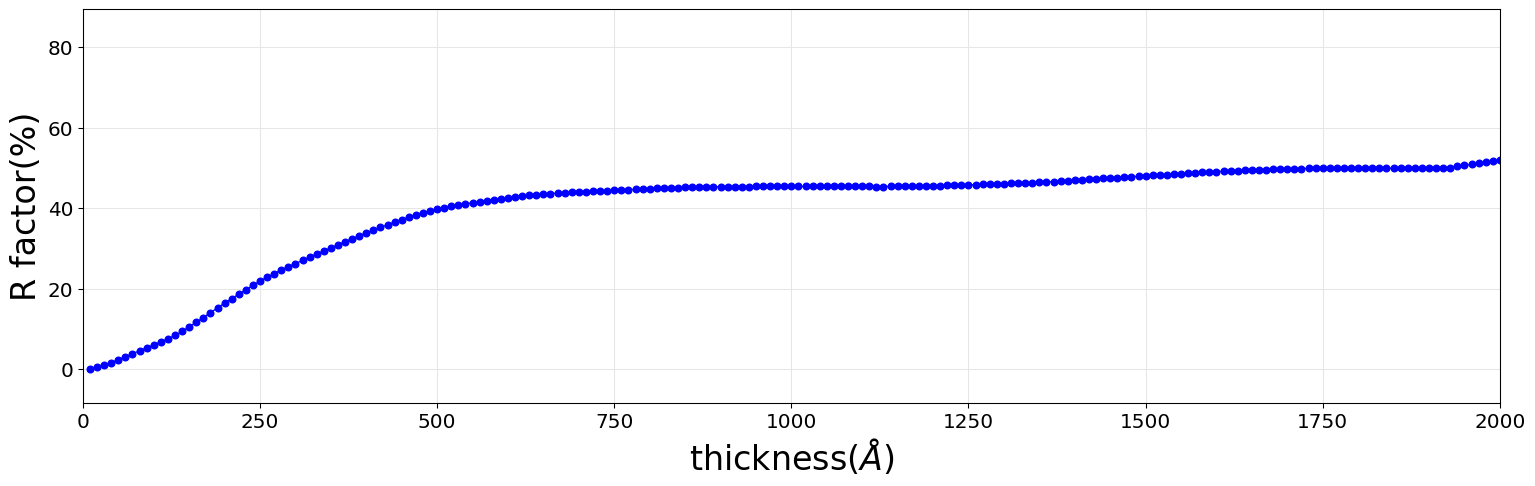

In [969]:
plts=[[thicks,Rfactors,'b-o','']]
fig,ax = dsp.stddisp(plts,labs=['thickness($\AA$)','R factor(%)'],
                     figsize=figs,xylims=['x',0,2000])#,0,50])

## (-5,0,5) reflection 

Let's look at the rocking specifically around reflection $(-5,0,5)$.

In [184]:
h=str((-5,0,5))
df_Fhkl = pd.read_pickle(b.get_Fhkl_pkl())
df_Fhkl['Fga']  = np.real(np.abs(df_Fhkl.F))
df_Fhkl['Ug']   = np.real(np.abs(df_Fhkl.F*cst.meff(200)/(np.pi*b.crys.volume)))
df_Fhkl['xi_g'] = b.k0/df_Fhkl.Ug
df_Fhkl.loc[[h]]

name = '-5_0_5'

u=rock.df.u[rock.beams.loc[h].f_cen]
# b0=bloch.Bloch(path='dat/LTA',u=u,**Sargs)
# b0.show_df_G()
uvw__505=ut.get_uvw(u,osc=0.2,npts=101)

In [ ]:
Sargs.update(dict(Smax=0.01,opts='s0',solve=True))
rock__505 = bl.Bloch_cont(path=rock_path(name),uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw)) )


Let's gather all the reflections in bragg condition at each point of the rocking curve.  

In [172]:
all_beams = [rock__505.load(i).df_G.sort_values('Swa')[['Sw','Uga','xi_g']] for i in range(rock__50_5.n_simus)]

### Rocking curve

5642.277553344294
total number of beams:1
gathering the intensities
gathering plots


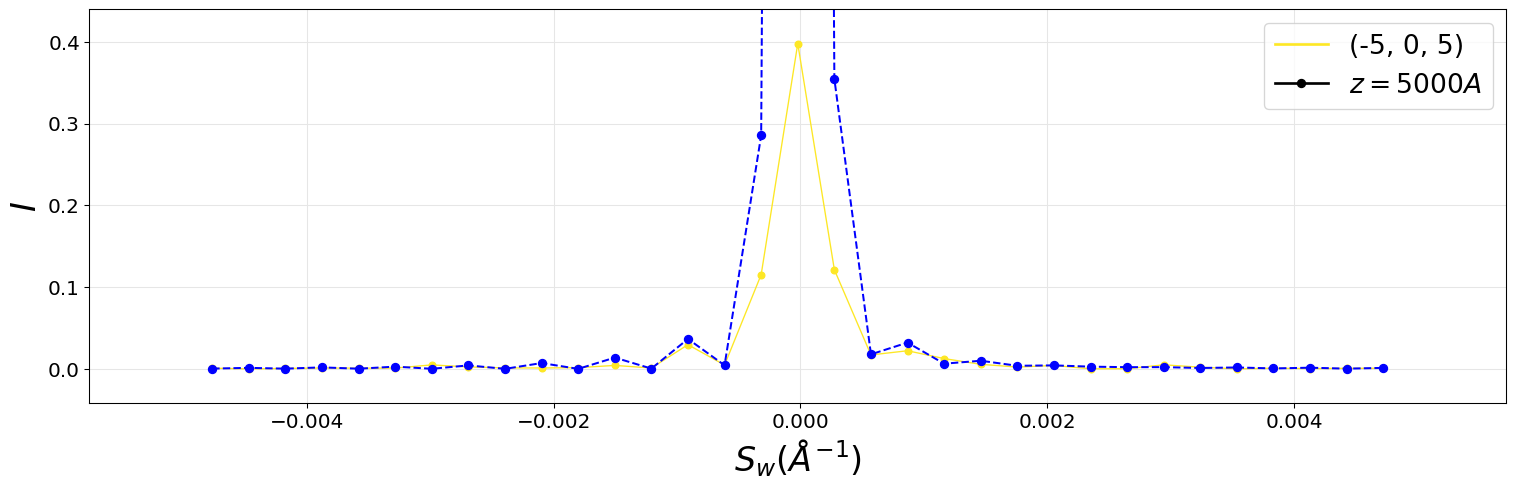

In [959]:
rock__505=ut.load_pkl(rock_file(name))
# rock__50_5.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)
# print('plot')
h=str((-5,0,5))
zs = [5000]
t=zs[0]
sw=rock.beams.loc[h].Sw
xi_g=np.real(df_Fhkl.loc[h].xi_g);print(xi_g)
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

fig,ax=rock__505.plot_rocking(refl=[h],zs=zs,figsize=figs)#,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')
ax.plot(sw,Ikin,'b--o',label='kin');



### 3 beam study 
In this study we will simulate rockings of some selected beams and only include the influence of the strongest neighbouring beam at each point of the rocking curve.


In [186]:
hkls = [hs.index[:3].values.tolist() for hs in all_beams]
_hkls=[]
for hs in hkls : 
    if h not in hs: hs[-1]=h
    _hkls.append(np.array([eval(h) for h in hs]))

name = '-5_0_5_3x3'

In [ ]:
Sargs.update(dict(Smax=0.01,opts='sv0',solve=True))
rock__505_3x3 = bl.Bloch_cont(path=rock_path(name),params=['hkl'],vals=[_hkls],uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw__505)) )

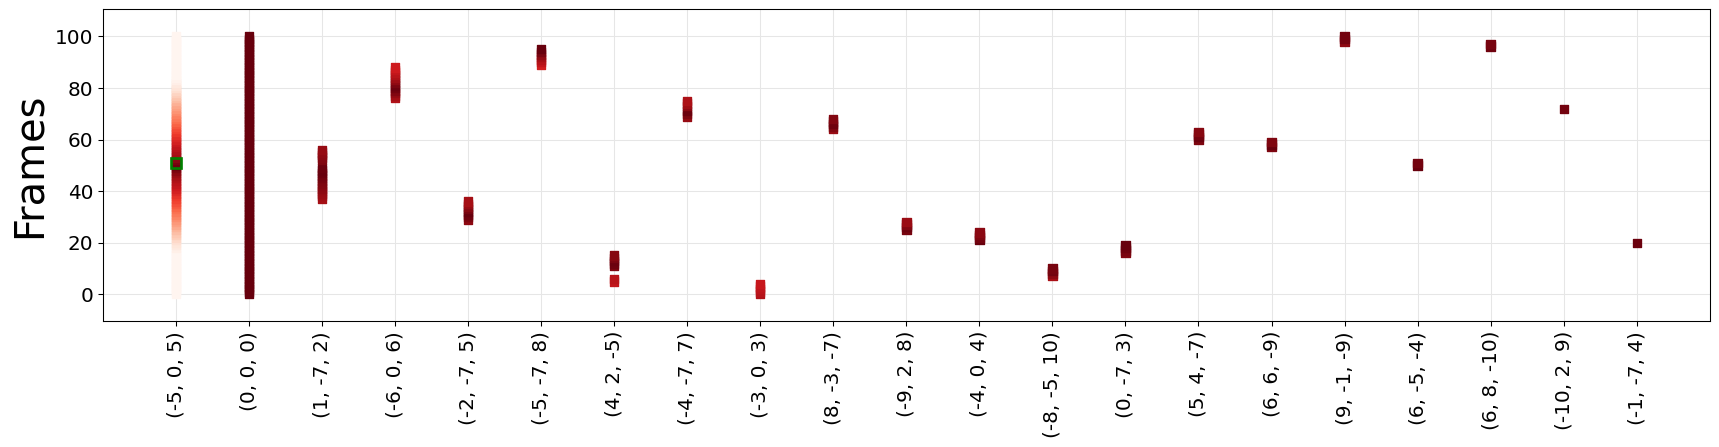

In [180]:
fig,ax=rock__505_3x3.show_excitation_map(vm=0.001,sw_min=5e-5,nb_max=50,figs=figs);

removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots


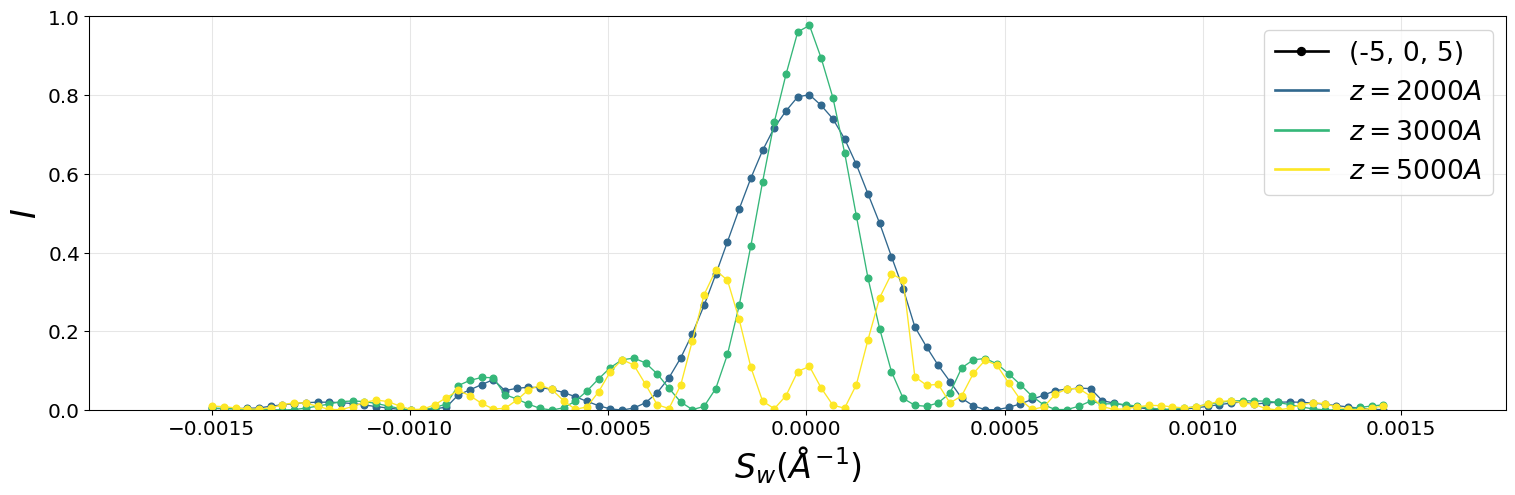

In [187]:
zs = [2000,3000,5000]
rock__505_3x3.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)
rock__505_3x3.plot_rocking(refl=[h],zs=zs,figsize=figs,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')

### Increasing the number of beams 

In [224]:
Nbeams = np.arange(2,50).tolist()
Sargs.update(dict(Smax=0.01,opts='s0',solve=True))

for N in Nbeams : 
    hkls = [hs.index[:N].values.tolist() for hs in all_beams]
    _hkls=[]
    for hs in hkls : 
        if h not in hs: hs[-1]=h
        _hkls.append(np.array([eval(h) for h in hs]))
    
    name = '-5_0_5_%dx%d' %(N,N)
    r = bl.Bloch_cont(path=rock_path(name),params=['hkl'],vals=[_hkls],uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw__505)) )
    r.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)


imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__000.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__000.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__001.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__001.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__002.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__002.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__003.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__003.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__004.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__004.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__005.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__005.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__006

In [753]:
zs = [500]
h=str((-5,0,5))
Iz=[ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]
#full dynamic 
Iend=rock__505.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock__505.df.nbeams.mean()
sw = r.beams.loc[h].Sw
#kinematic
xi_g,t=np.real(df.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities


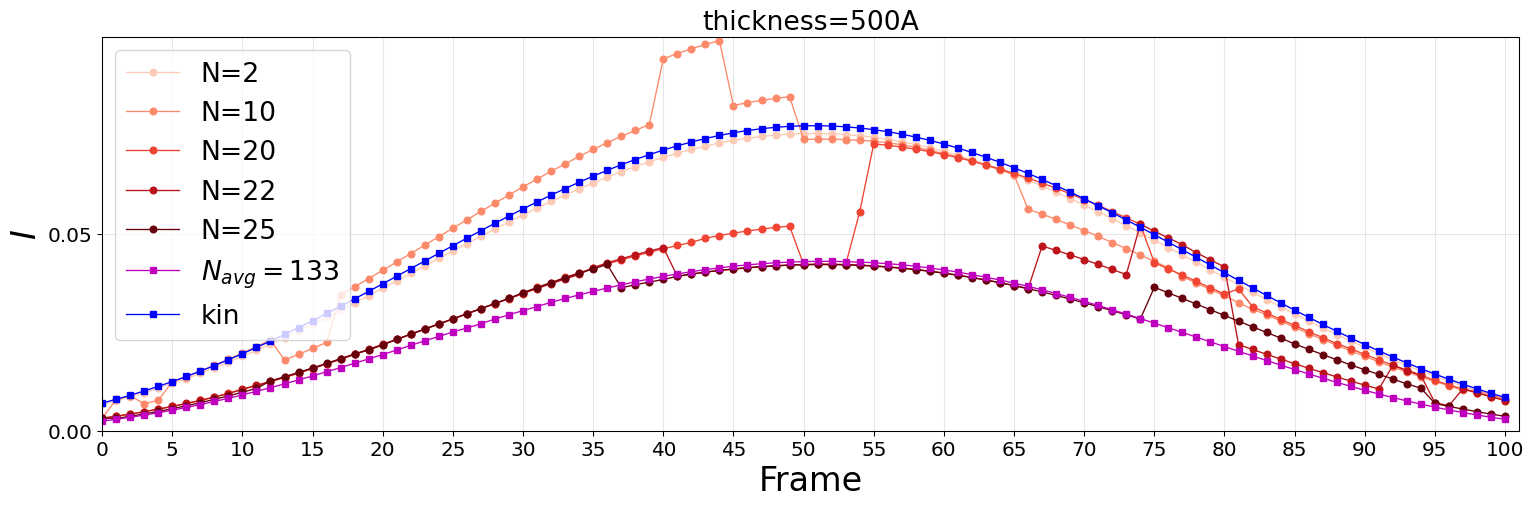

In [754]:
# fig,ax=dsp.create_fig(figsize=figs)
idx = [0,8,18,20,23]
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'

cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

dsp.stddisp(plts,labs=[xlab,'$I$'],xyTicks=[5,0.05],
            xylims=[0,101,0,0.1],title='thickness=%dA' %zs[0], 
            figsize=figs);

In [515]:
idx = 18
_hkls=np.array(mut.get_hkls(all_beams,idx+2,h=str((-5,0,5)),index=True))
# print(_hkls[49]);print(_hkls[50])

    
mut.get_beam_diff(_hkls,49);
mut.get_beam_diff(_hkls,53);
mut.get_beam_diff(_hkls,54);

(-9, 2, 8) -> (-6, 0, 6) 
(-3, 0, 3) -> (3, 2, -4) 
(-2, 0, 2) -> (8, -10, -4) 


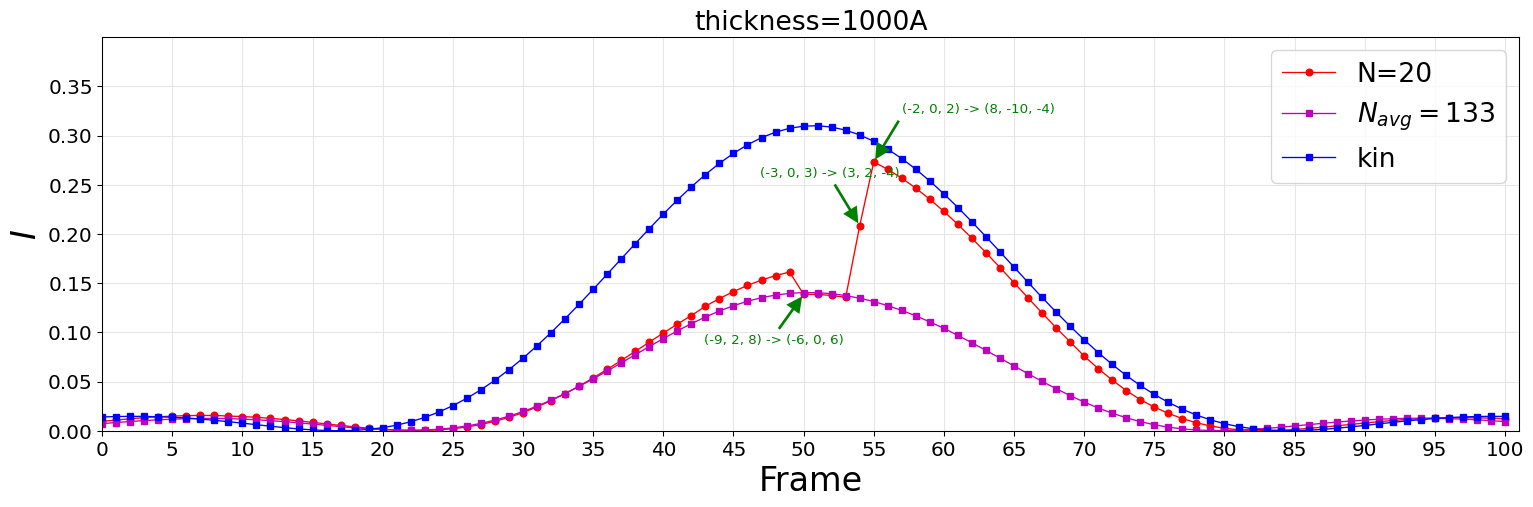

In [523]:
xi_g,t=np.real(df_Fhkl.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

x=np.arange(len(Iz[0]))
plts =[[x,Iz[idx],'r-o','N=%d' %Nbeams[idx]] ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

fig,ax=dsp.stddisp(plts,labs=['Frame','$I$'],xyTicks=[5,0.05],
            xylims=[0,101,0,0.4],title='thickness=%dA' %zs[0], 
            figsize=figs);
frames={49:(-1,-1,'center'),53:(-1,1,'center'),54:(1,1,'left')}
for f,(sx,sy,ha) in frames.items(): 
    txt = mut.get_beam_diff(_hkls,f,v=False);
    x,y=f+1, Iz[idx][f+1]
    ax.annotate('%s' %txt, xy=(x,y), color='g',xytext=(x+sx*2,y+sy*0.05),ha=ha,
                arrowprops=dict(facecolor='g',edgecolor='none', shrink=0.05,width=2),
                )
dsp.saveFig('paper_figs/%s')

### Running major beams 
In this simulations we will try to iteratively remove the beams that only affect the intensity of $h=(-5,0,5)$ at 500A by less that 5% . We will keep track of the contributions of each beam.

In [1044]:
#create a copy of the simulation to goof around
imp.reload(bloch)
rock=ut.load_pkl(rock_file('-5_0_5'))
b = copy.copy(rock.load(50))
b.set_name(name='-5_0_5',path=rpath+'/tests')
b.save()

using dpi=96
using screenszie=[20.0,11.25] inches
object saved
dat/LTA/rocks/tests/-5_0_5.pkl


In [1005]:
b = ut.load_pkl('dat/LTA/rocks/tests/-5_0_5.pkl')
h0 = [h,str((0,0,0))]
hkls = b.df_G.sort_values('Swa').index
df_hkl=dict()#np.zeros(len(hkls))#pd.DataFrame(columns=['dI'])
thick=500
h=str((-5,0,5))
b.solve(Nmax=10,opts='')
b.set_thickness(thick=thick,v=False)
I0 = b.df_G.loc[h,'I']
for hi in hkls.drop(h0):    
    #### run without beam hi
    _hkls = np.array([eval(s) for s in hkls.drop(hi)])
    b.solve(hkl=_hkls,opts='',Nmax=10,Smax=0)
    b.set_thickness(thick=thick,v=False)
    # print(hi,len(_hkls),b.df_G.loc[h,'I'],(b.df_G.loc[h,'I']-I0)/I0)
    v=(b.df_G.loc[h,'I']-I0)/I0
    df_hkl[hi]=v
    if abs(v)<0.02:        
        hkls=hkls.drop(hi)
        I0 = b.df_G.loc[h,'I']
df_hkl=pd.DataFrame.from_dict(df_hkl,orient='index',columns=['dI'])  
df_hkl['dIa'] = df_hkl.dI.abs() 

In [1006]:
print(df_hkl.loc[df_hkl.dIa>0.01].sort_values('dIa',ascending=False).to_string())

                   dI       dIa
(-3, 0, 3)   0.375393  0.375393
(-2, 0, 2)   0.372727  0.372727
(1, 0, -1)   0.229749  0.229749
(-6, 0, 6)   0.219935  0.219935
(-4, 0, 4)  -0.157167  0.157167
(-1, 0, 1)  -0.156865  0.156865
(5, 4, -7)   0.026627  0.026627
(-2, -2, 3) -0.016077  0.016077
(-3, 2, 2)   0.014838  0.014838


In [1064]:
b.solve(Nmax=10,thick=thick,opts='vt',Smax=0.01)
I0 = b.df_G.loc[h,'I']
_hkls = np.array([eval(s) for s in df_hkl.loc[df_hkl.dIa>0.01].index.tolist()+h0 ])
b.solve(hkl=_hkls,Nmax=10,Smax=0,opts='vt',thick=thick)
I = b.df_G.loc[h,'I']
print('Iref = %.2e' %I0)
print('Ical = %.2e' %I )
print('Idif = %.2e' %(I0-i))
print('err  = %.1f %%' %(abs(I0-I)/I0*100))


 ...assembling 136x136 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
updated intensities
 ...assembling 11x11 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
updated intensities
Iref = 4.30e-02
Ical = 4.11e-02
Idif = -2.60e+01
err  = 4.3 %


### Integration

In [449]:
for N in Nbeams : 
    r=ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N)))
    r._integrate_rocking(refl=[h])

object saved
dat/LTA/rocks/-5_0_5_2x2/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_3x3/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_4x4/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_5x5/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_6x6/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_7x7/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_8x8/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_9x9/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_10x10/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_11x11/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_12x12/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_13x13/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_14x14/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_15x15/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_16x16/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks

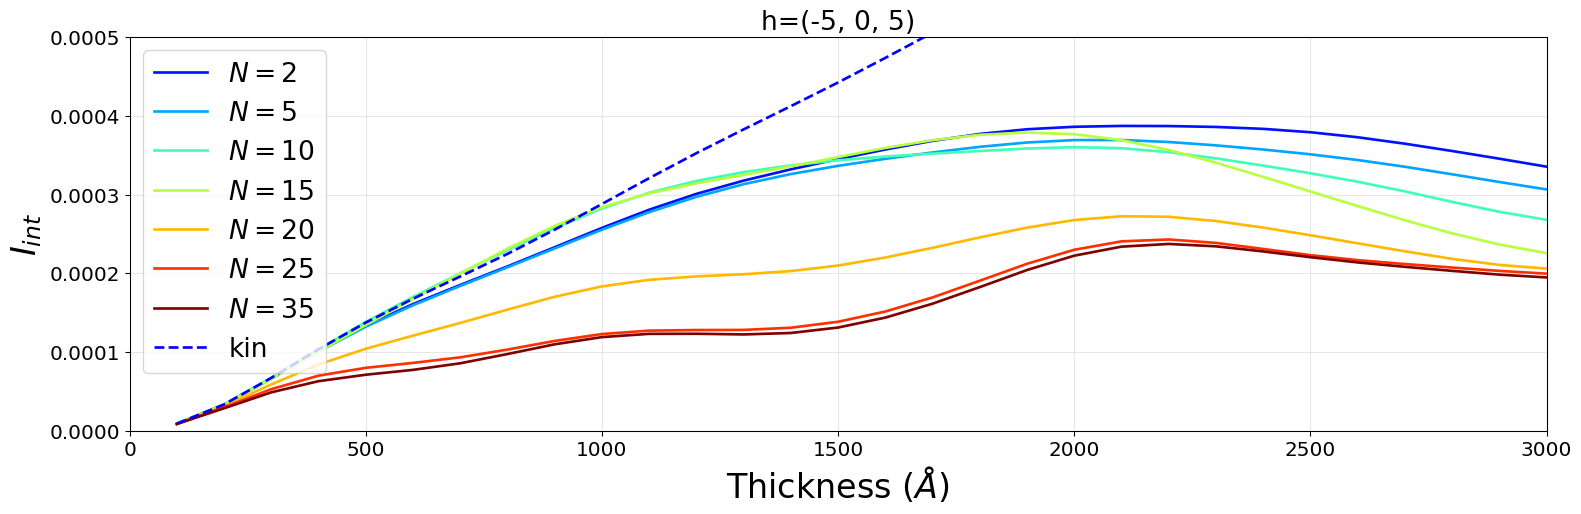

In [1069]:
## kinematic integration
h=str((-5,0,5))
xi_g=np.real(df_Fhkl.loc[h].xi_g)
r=ut.load_pkl(rock_file('-5_0_5_%dx%d' %(2,2)))
sw,z=np.array(r.beams.loc[h].Sw),r.load(0).z
# print(len(sw),z.shape)
Ikin = lambda sg,t,xi_g : ((np.pi*t/xi_g)*np.sinc(sg*t))**2
Ikins = np.array([integrate.trapz(Ikin(sw,t,xi_g),sw) for t in z])

h=str((-5,0,5))
idx = [0,3,8,13,18,23,33]
cs = dsp.getCs('jet',len(np.array(Nbeams)[idx]))

plts=[[z,ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N))).Iz_dyn[h],c,'$N=%d$' %N] for N,c in zip(np.array(Nbeams)[idx],cs)]
plts+=[[z,Ikins,'b--','kin']]
dsp.stddisp(plts,labs=['Thickness ($\AA$)','$I_{int}$'],#xyTicks=[5,0.05],
            xylims=[0,3000,0,0.0005],#,0,0.4],
            title='h=%s' %h, figsize=figs,lw=2);

## (-3,0,3) reflection 
### Run rocking curve

In [855]:
h=str(tuple([-3,0,3]))
rock=ut.load_pkl(rock_file('Nbeam'))
# print(rock.beams.loc[h])
u=rock.df.u[rock.beams.loc[h].f_cen]
# print(rock.beams.loc[h].f_cen,u)
Sargs=dict(cif_file=cif_file,Smax=0.01,keV=200,Nmax=10,solve=True,opts='s0',v=False)
Nbeams=np.arange(2,50,1).tolist()

# import misc_utils as mut;imp.reload(mut)
h_name=mut.refl_rocking_curve(h,u,osc=1,npts=101,Nbeams=Nbeams,Sargs=Sargs,path='dat/LTA/rocks/',full=True)

run full rocking curve
creating directory: dat/LTA/rocks//-3_0_3

...Structure factors...
structure factors updated.
rocking N=2x2
creating directory: dat/LTA/rocks//-3_0_3_2x2

...Structure factors...
structure factors updated.
rocking N=3x3
creating directory: dat/LTA/rocks//-3_0_3_3x3

...Structure factors...
structure factors updated.
rocking N=4x4
creating directory: dat/LTA/rocks//-3_0_3_4x4

...Structure factors...
structure factors updated.
rocking N=5x5
creating directory: dat/LTA/rocks//-3_0_3_5x5

...Structure factors...
structure factors updated.
rocking N=6x6
creating directory: dat/LTA/rocks//-3_0_3_6x6

...Structure factors...
structure factors updated.
rocking N=7x7
creating directory: dat/LTA/rocks//-3_0_3_7x7

...Structure factors...
structure factors updated.
rocking N=8x8
creating directory: dat/LTA/rocks//-3_0_3_8x8

...Structure factors...
structure factors updated.
rocking N=9x9
creating directory: dat/LTA/rocks//-3_0_3_9x9

...Structure factors...
structure fact

### Display rocking curves

In [856]:
zs = [500]
h=str(tuple([-3,0,3]))
h_name = h[1:-1].replace(', ','_')
Iz=[ut.load_pkl(rock_file('%s_%dx%d' %(h_name,N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]

#full dynamic 
rock_full = ut.load_pkl(rock_file(h_name))
rock_full._get_iZs(iZs=None,zs=zs)
Iend = rock_full.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock_full.df.nbeams.mean()



total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities


using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
xi_g((-3, 0, 3)) = 6471.3A


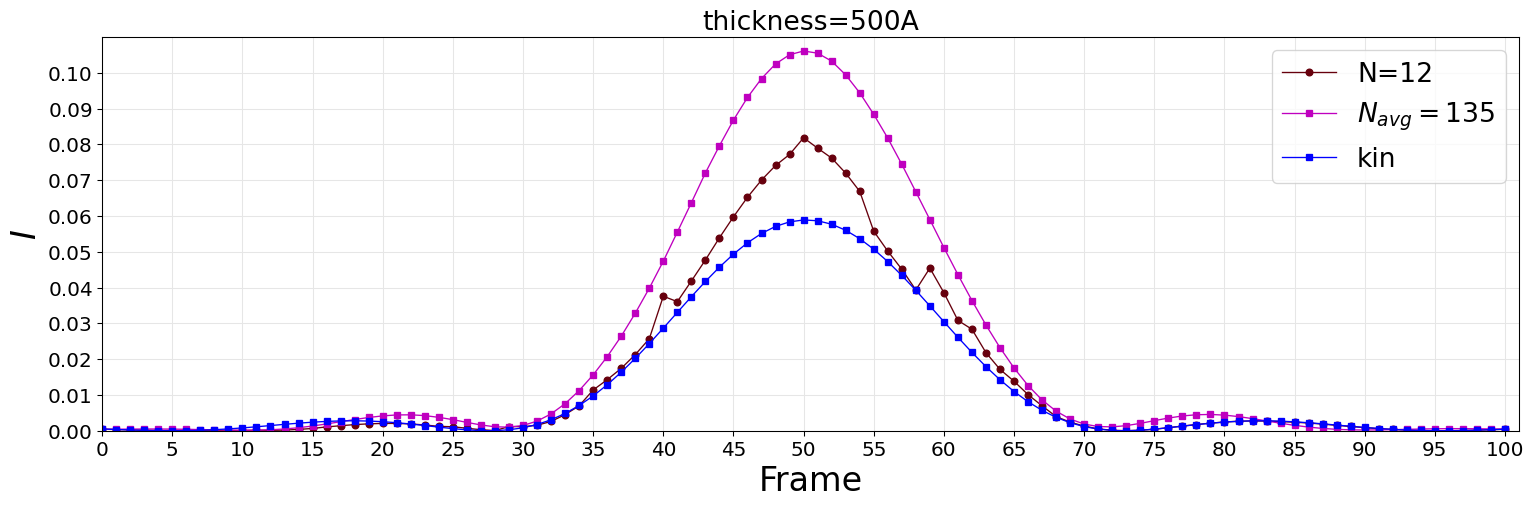

In [915]:
import misc_utils as mut;imp.reload(mut)
idx = [10]#(np.arange(20,30,2)-2).tolist() 
sw = rock_full.beams.loc[h].Sw
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'

#kinematic
print('xi_g(%s) = %.1fA' %(h,xi_g))
xi_g,t=np.real(rock_full.load(0).df_G.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2


cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

fig,ax=dsp.stddisp(plts,labs=[xlab,'$I$'],
            xyTicks=[5,0.01],xylims=[0,101,0,0.11],
            title='thickness=%dA' %zs[0], 
            figsize=figs);

_hkls = mut.get_hkls(h,rpath,idx[0]+2,index=True)
# mut.annotate_beams(ax,_hkls,frames={44:(-1,0,'right'),49:(-1,-1,'center'),50:(1,-1,'center')},I=Iz[5])
# mut.annotate_beams(ax,_hkls,frames={48:(-1,0,'right'),52:(1,0,'left')},I=Iz[20])
# dsp.saveFig('paper_figs/%s')

## (-1,-7,4) reflection 
### Run rocking curves 

In [610]:
h=str(tuple([-1,-7,4]))
rock=ut.load_pkl(rock_file('Nbeam'))
u=rock.df.u[rock.beams.loc[h].f_cen]
# print(rock.beams.loc[h].f_cen,u)
Sargs=dict(cif_file=cif_file,Smax=0.01,keV=200,Nmax=10,solve=True,opts='s0',v=False)
Nbeams=np.arange(2,50,1).tolist()

# import misc_utils as mut;imp.reload(mut)
# h_name=mut.refl_rocking_curve(h,u,osc=0.6,npts=101,Nbeams=Nbeams,Sargs=Sargs,path='dat/LTA/rocks/',full=True)

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
run full rocking curve
rocking N=2x2
rocking N=3x3
rocking N=4x4
rocking N=5x5
rocking N=6x6
rocking N=7x7
rocking N=8x8
rocking N=9x9
rocking N=10x10
rocking N=11x11
rocking N=12x12
rocking N=13x13
rocking N=14x14
rocking N=15x15
rocking N=16x16
rocking N=17x17
rocking N=18x18
rocking N=19x19
rocking N=20x20
rocking N=21x21
rocking N=22x22
rocking N=23x23
rocking N=24x24
rocking N=25x25
rocking N=26x26
rocking N=27x27
rocking N=28x28
rocking N=29x29
rocking N=30x30
rocking N=31x31
rocking N=32x32
rocking N=33x33
rocking N=34x34
rocking N=35x35
rocking N=36x36
rocking N=37x37
rocking N=38x38
rocking N=39x39
rocking N=40x40
rocking N=41x41
rocking N=42x42
rocking N=43x43
rocking N=44x44
rocking N=45x45
rocking N=46x46
rocking N=47x47
rocking N=48x48
rocking N=49x49


### Display rocking curves 

In [818]:
zs = [500]
h=str(tuple([-1,-7,4]))
h_name = h[1:-1].replace(', ','_')
Iz=[ut.load_pkl(rock_file('%s_%dx%d' %(h_name,N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]

#full dynamic 
rock_full = ut.load_pkl(rock_file(h_name))
rock_full._get_iZs(iZs=None,zs=zs)
Iend = rock_full.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock_full.df.nbeams.mean()
#kinematic
xi_g,t=np.real(rock_full.load(0).df_G.loc[h].xi_g),zs[0];print(xi_g)
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2


total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities


420978.78046858264


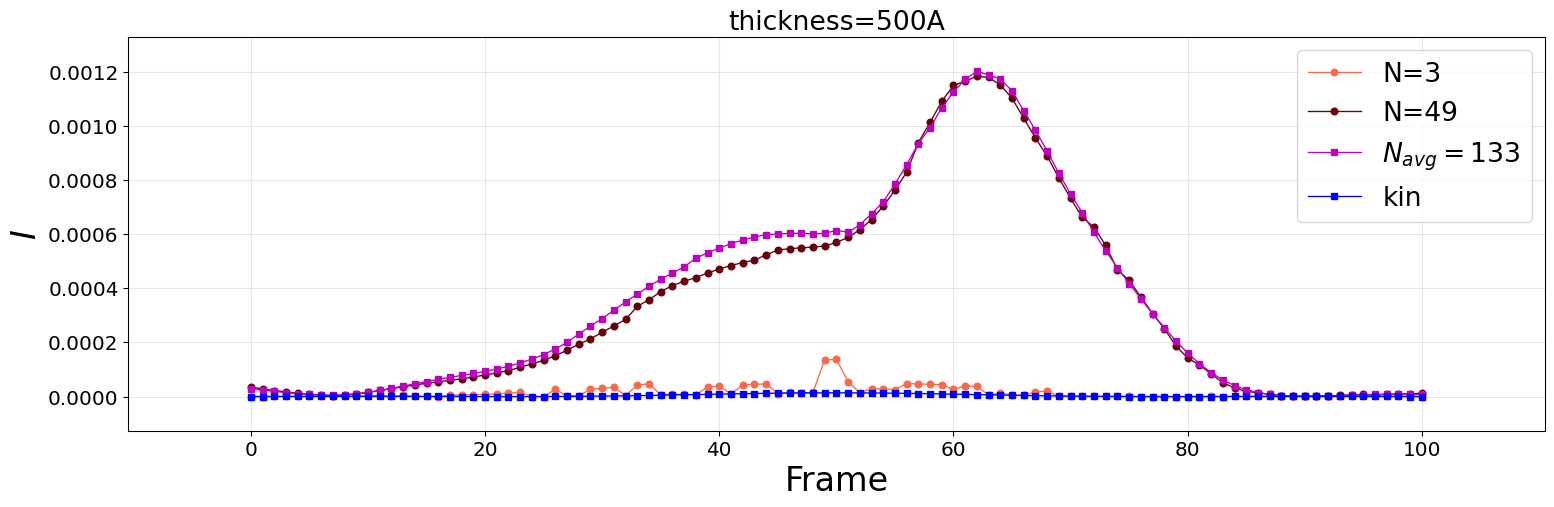

In [822]:
idx = [1,-1]#(np.arange(20,30,2)-2).tolist() 
sw = rock_full.beams.loc[h].Sw
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'
print(xi_g)
cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

dsp.stddisp(plts,labs=[xlab,'$I$'],
            # xyTicks=[5,0.0005],xylims=[0,101,0,0.0015],
            title='thickness=%dA' %zs[0], 
            figsize=figs);

## 